In [9]:
import tensorflow as tf
tf.keras.models.Model()

In [37]:
import matplotlib.pyplot as plt

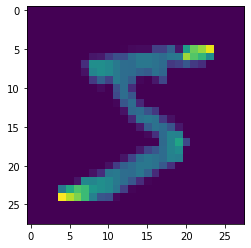

In [38]:
plt.imshow(x_train[0])
plt.show()

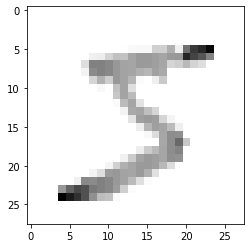

In [39]:
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test,y_test) = mnist.load_data()

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [30]:
x_train= tf.keras.utils.normalize(x_train,axis=1)
x_test= tf.keras.utils.normalize(x_test,axis=1)

In [7]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [31]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) # takes 28 x 28 images and makes it 1 x 784
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu)) # simple fully connected layer
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

In [32]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy', #minimizing loss by calculating error
             metrics=['accuracy'])

model.fit(x_train,y_train,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2596 - accuracy: 0.9243
Epoch 2/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.1076 - accuracy: 0.9664
Epoch 3/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0746 - accuracy: 0.9768
Epoch 4/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0546 - accuracy: 0.9819
Epoch 5/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0412 - accuracy: 0.9863
Epoch 6/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0316 - accuracy: 0.9897
Epoch 7/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0268 - accuracy: 0.9906
Epoch 8/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0205 - accuracy: 0.9931
Epoch 9/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.0171 - accuracy: 0.9942
Epoch 10/10
60

In [33]:
val_loss, val_acc = model.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 47us/sample - loss: 0.1032 - accuracy: 0.9764


In [34]:
val_loss


0.10322866258713512

In [35]:
val_acc

0.9764

In [36]:
model.save('digit_predictor_model.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: digit_predictor_model.model\assets


In [40]:
new_model = tf.keras.models.load_model('digit_predictor_model.model')

In [41]:
prediction = new_model.predict(x_test)

In [43]:
prediction

array([[7.2526025e-17, 2.4128830e-13, 7.5168853e-13, ..., 1.0000000e+00,
        7.6933964e-17, 6.7564444e-13],
       [6.8818512e-20, 4.2071134e-12, 1.0000000e+00, ..., 8.9719037e-18,
        2.5703615e-14, 2.0574515e-26],
       [2.3165332e-11, 9.9999523e-01, 2.3701821e-09, ..., 4.1222643e-06,
        2.2135148e-07, 6.5343191e-12],
       ...,
       [2.3407600e-14, 3.5901273e-13, 1.0456109e-15, ..., 8.4269064e-11,
        4.7975309e-12, 9.0352820e-08],
       [3.6988345e-15, 3.4363184e-17, 2.2741028e-17, ..., 7.4886293e-15,
        4.0357222e-08, 5.2123536e-15],
       [1.7432561e-13, 4.3286666e-15, 2.3161520e-14, ..., 1.5770203e-20,
        1.5086315e-12, 1.1536072e-17]], dtype=float32)

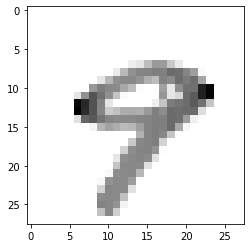

In [53]:
plt.imshow(x_test[9], cmap = plt.cm.binary)
plt.show()

In [46]:
prediction[0]

array([7.2526025e-17, 2.4128830e-13, 7.5168853e-13, 7.3284129e-10,
       6.2459632e-16, 1.0595033e-15, 1.4467032e-19, 1.0000000e+00,
       7.6933964e-17, 6.7564444e-13], dtype=float32)

In [47]:
import numpy as np

In [52]:
np.argmax(prediction[9])

9

In [54]:
!pip install tensorflow

ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\users\\varun\\anaconda3\\envs\\numerouno\\lib\\site-packages\\~cipy\\fft\\_pocketfft\\pypocketfft.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1
  Attempting uninstall: scipy
    Found existing installation: scipy 1.5.2
    Uninstalling scipy-1.5.2:
      Successfully uninstalled scipy-1.5.2
